# Fargo Healthcare Case Study

### 1. Present the business problem and emphasize the necessity for a data analytic solution

As fargo Healthcare faced shortage of examining physicians at hospital, HCs had to outsource their disability to OCs. These OC's were highly expensive, and also HC's were supposed to pay fine to Regional Health of Office Oversight. So, Fargo had to opt to perform predictive analysis for the company's upcoming patients based on the history data from 2006 to 2013.

The necessity of the data analytic solution has been observed in order to optimize the forecasting of the demand of the examinations at the Abbeville, LA. As the hospital was suffering from the shortage of examination physicians, they had to redirect the requests to other Health care centers. With this data analytic approach, Fargo Health care can estimate the no. of requests coming in and can maintain the demand and supply functions equally as per it's resources or can hire more physicians as per the demand trend.

### 2. Explain the data inconsistencies you noticed and how it can be resolved?

There are many garbage values and outliers in the target column 'Information Examination' which needs to be handled for accurate prediction.
In the below model the garbage values are replaced with Null values and then later replaced with its respective Year's mean value. Outliers are detected with the help of Upper and Lower quantile ranges and again replaced with its Year's mean value. This is handled in below model as a part of Data preprocessing.

### 3. Build time series model and comment on the accuracy.

Below is the ARIMA model used for predicting the Incoming Examinations for Fargo Healthcare.

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import pmdarima
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# Reading the file

In [2]:
Abbeville1=pd.read_csv(r'C:\Users\ASHU\Downloads\SCIT_Academics\Sem 2\Financial Analytics\Assignment 2\stock data/HTCMF.csv')
Abbeville1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-10,18.5,18.5,18.5,18.5,-0.000025,250
1,2014-10-13,18.5,18.5,18.5,18.5,-0.000025,0
2,2014-10-14,18.5,18.5,18.5,18.5,-0.000025,0
3,2014-10-15,18.5,18.5,18.5,18.5,-0.000025,0
4,2014-10-16,18.5,18.5,18.5,18.5,-0.000025,0
5,2014-10-17,18.5,18.5,18.5,18.5,-0.000025,0
6,2014-10-20,18.5,18.5,18.5,18.5,-0.000025,0
7,2014-10-21,18.5,18.5,18.5,18.5,-0.000025,0
8,2014-10-22,18.5,18.5,18.5,18.5,-0.000025,0
9,2014-10-23,18.5,18.5,18.5,18.5,-0.000025,0


### Sorting data Yearwise

In [3]:
Abbeville=Abbeville1.sort_values(by=['Year','Month'])

### Converting Text & Symbols into NaN

In [4]:
Abbeville['Incoming Examinations'] = pd.to_numeric(Abbeville1['Incoming Examinations'],errors='coerce')

In [5]:
Abbeville

,Year,Month,Incoming Examinations
2,2006,1,362.0
0,2006,2,436.0
8,2006,3,NaN
3,2006,4,490.0
1,2006,5,508.0
...,...,...,...
84,2013,8,4978.0
90,2013,9,5008.0
94,2013,10,6094.0
86,2013,11,4874.0


#### Here we can see the total number of rows and columns are 96 and 3 in Abbeville

In [6]:
Abbeville.shape

(96, 3)

# Data Pre-processing

## 1) Rows with NaN Values

In [7]:
df = Abbeville[Abbeville['Incoming Examinations'].isna()]
df.shape

(9, 3)

### Rows without NaN Values

In [8]:
df1 = Abbeville[Abbeville['Incoming Examinations'].notna()]
df1.shape

(87, 3)

## 2) Detecting Outliers

<AxesSubplot:>

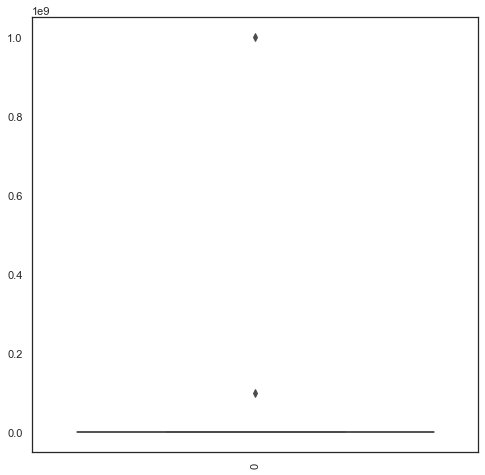

In [9]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.boxplot(data=df1['Incoming Examinations'])

In [10]:
for outlier in ['Incoming Examinations']:
    q1 = np.percentile(df1[outlier],25)
    q3 = np.percentile(df1[outlier],75)
    iqr = q3-q1
    uqr = q3+1.5*iqr
    lqr = q1 - 1.5*iqr
    #df3=df1.loc[df1[outlier] < iqr,outlier]
    df1.loc[df1[outlier] > uqr,outlier]=np.NaN
df1
len(df1)

C:\Users\abc\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


87

### Outliers Removed

<AxesSubplot:>

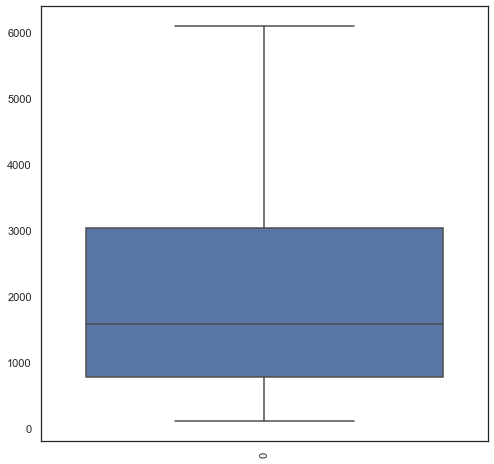

In [11]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.boxplot(data=df1['Incoming Examinations'])

In [12]:
df2=df1.append(df)
df2

,Year,Month,Incoming Examinations
2,2006,1,362.0
0,2006,2,436.0
3,2006,4,490.0
1,2006,5,508.0
10,2006,7,393.0
...,...,...,...
54,2010,1,NaN
53,2010,2,NaN
48,2010,6,NaN
64,2011,12,NaN


## Calculating Mean Year wise

In [14]:
mean2006=df2.loc[df2["Year"] == 2006, "Incoming Examinations"].mean()
mean2007=df2.loc[df2["Year"] == 2007, "Incoming Examinations"].mean()
mean2008=df2.loc[df2["Year"] == 2008, "Incoming Examinations"].mean()
mean2009=df2.loc[df2["Year"] == 2009, "Incoming Examinations"].mean()
mean2010=df2.loc[df2["Year"] == 2010, "Incoming Examinations"].mean()
mean2011=df2.loc[df2["Year"] == 2011, "Incoming Examinations"].mean()
mean2012=df2.loc[df2["Year"] == 2012, "Incoming Examinations"].mean()
mean2013=df2.loc[df2["Year"] == 2013, "Incoming Examinations"].mean()

## Dividing Dataset in small datasets year wise to replace NaN values with mean

In [15]:
df2006=df2.loc[(df2['Year'] == 2006)]
df2007=df2.loc[(df2['Year'] == 2007)]
df2008=df2.loc[(df2['Year'] == 2008)]
df2009=df2.loc[(df2['Year'] == 2009)]
df2010=df2.loc[(df2['Year'] == 2010)]
df2011=df2.loc[(df2['Year'] == 2011)]
df2012=df2.loc[(df2['Year'] == 2012)]
df2013=df2.loc[(df2['Year'] == 2013)]

## Replace NaN values with plausible mean values

In [16]:
df2006['Incoming Examinations'].fillna(mean2006,inplace=True)
df2007['Incoming Examinations'].fillna(mean2007,inplace=True)
df2008['Incoming Examinations'].fillna(mean2008,inplace=True)
df2009['Incoming Examinations'].fillna(mean2009,inplace=True)
df2010['Incoming Examinations'].fillna(mean2010,inplace=True)
df2011['Incoming Examinations'].fillna(mean2011,inplace=True)
df2012['Incoming Examinations'].fillna(mean2012,inplace=True)
df2013['Incoming Examinations'].fillna(mean2013,inplace=True)

C:\Users\abc\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Combining all small datasets to make complete dataset

In [17]:
frames = [df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013]
final_data = pd.concat(frames)
final_data

,Year,Month,Incoming Examinations
2,2006,1,362.000000
0,2006,2,436.000000
3,2006,4,490.000000
1,2006,5,508.000000
10,2006,7,393.000000
...,...,...,...
84,2013,8,4978.000000
90,2013,9,5008.000000
94,2013,10,6094.000000
86,2013,11,4874.000000


In [18]:
final_data['Date'] = final_data['Year'].map(str)+"/"+final_data['Month'].map(str)

In [19]:
final_data=final_data.drop(['Month','Year'],axis=1)

In [20]:
final_data['Date'] = pd.to_datetime(final_data['Date'])

In [21]:
final_data=final_data.sort_values(by=['Date'])

In [22]:
final_data.shape

(96, 2)

In [23]:
final_data.to_csv("finalAbbe.csv")

In [24]:
final_data= pd.read_csv("finalAbbe.csv")

In [25]:
final_data= final_data.drop(columns=['Unnamed: 0'])

In [26]:
final_data['Date'] = pd.to_datetime(final_data['Date'])

In [27]:
final_data

,Incoming Examinations,Date
0,362.000000,2006-01-01
1,436.000000,2006-02-01
2,498.800000,2006-03-01
3,490.000000,2006-04-01
4,508.000000,2006-05-01
...,...,...
91,4978.000000,2013-08-01
92,5008.000000,2013-09-01
93,6094.000000,2013-10-01
94,4874.000000,2013-11-01


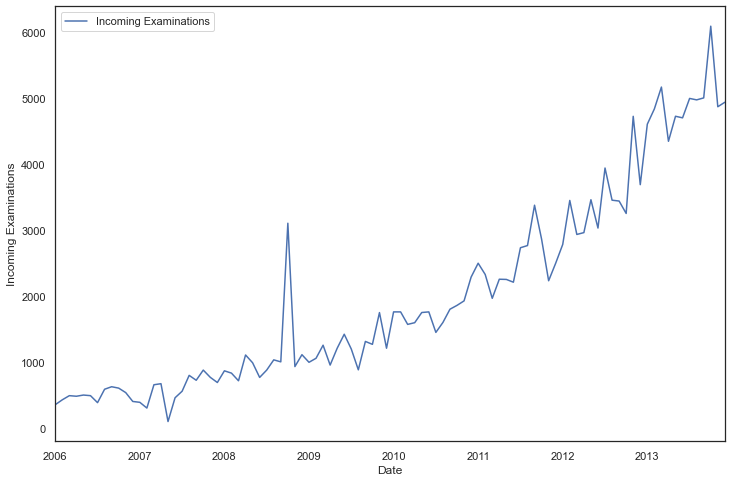

In [28]:
ax = final_data.set_index('Date').plot(figsize=(12, 8))
ax.set_ylabel('Incoming Examinations')
ax.set_xlabel('Date')

plt.show()

In [29]:
df1 = pd.read_csv("finalAbbe.csv",parse_dates = ['Date'], index_col = 'Date')
df1= df1.drop(columns=['Unnamed: 0'])

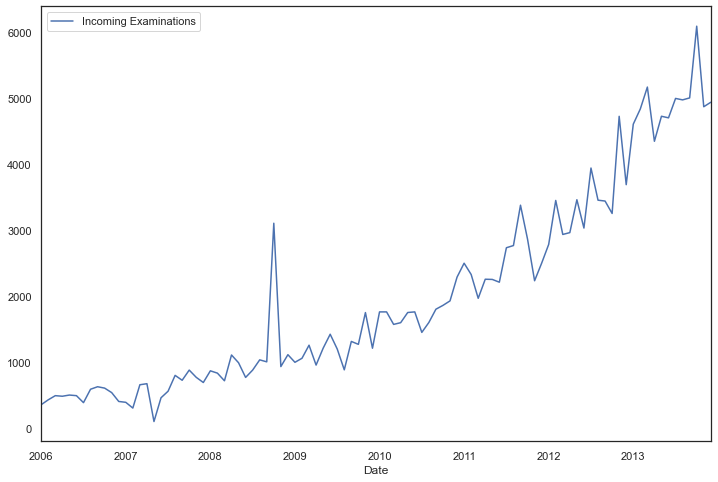

In [30]:
# increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df1.plot()
plt.show()

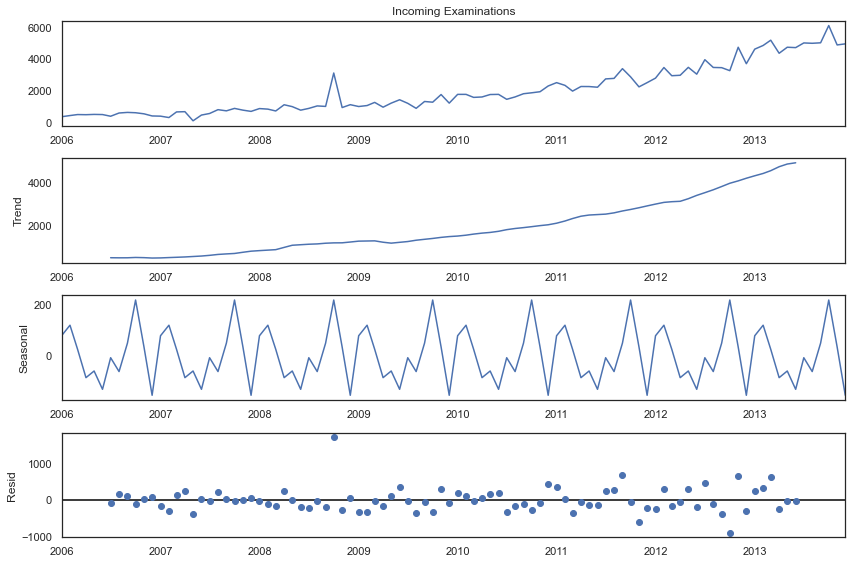

In [31]:
# Decompose the seasonality using multiplicative model or by multiplicatively

df1_mul_decompose = seasonal_decompose(df1["Incoming Examinations"],model = 'Multiplicative')
df1_mul_decompose.plot()
plt.show()

In [32]:
#Determing rolling statistics
rolmean = df1.rolling(window=12).mean()
rolstd = df1.rolling(window=12).std()
print(rolmean, rolstd)

            Incoming Examinations
Date                             
2006-01-01                    NaN
2006-02-01                    NaN
2006-03-01                    NaN
2006-04-01                    NaN
2006-05-01                    NaN
...                           ...
2013-08-01            4459.583333
2013-09-01            4589.750000
2013-10-01            4826.083333
2013-11-01            4838.166667
2013-12-01            4942.181818

[96 rows x 1 columns]             Incoming Examinations
Date                             
2006-01-01                    NaN
2006-02-01                    NaN
2006-03-01                    NaN
2006-04-01                    NaN
2006-05-01                    NaN
...                           ...
2013-08-01             640.450191
2013-09-01             570.647977
2013-10-01             556.041113
2013-11-01             555.314626
2013-12-01             422.545279

[96 rows x 1 columns]


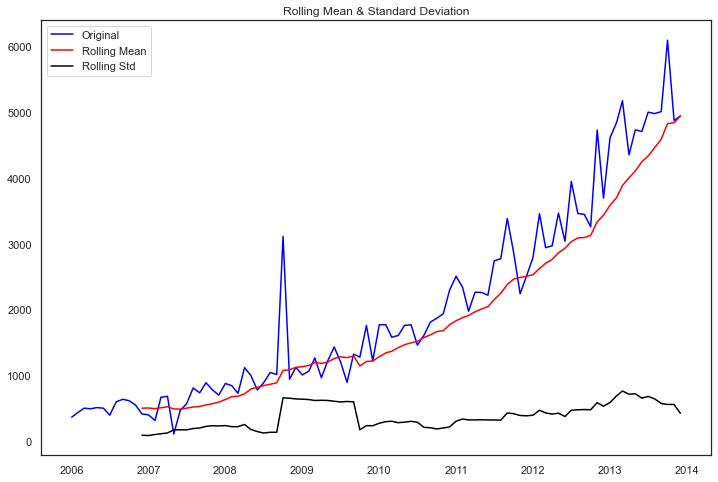

In [33]:
#Plot rolling statistics:
orig = plt.plot(df1, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Non-Seasonal ARIMA

In [92]:
model = pm.auto_arima(final_data['Incoming Examinations'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1415.308, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1453.783, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1427.495, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1413.626, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1452.667, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1415.302, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1422.379, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.983 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -703.813
Date:                Tue, 18 Jan 2022   AIC                           1413.626
Time:                        23:09:56   B

In [85]:
# Split data into train / test sets
train = final_data.iloc[:len(final_data)-12]
test = final_data.iloc[len(final_data)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1) on the training set
  
model = ARIMA(train['Incoming Examinations'], 
                order = (0, 1, 1))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D.Incoming Examinations   No. Observations:                   83
Model:                      ARIMA(0, 1, 1)   Log Likelihood                -609.799
Method:                            css-mle   S.D. of innovations            373.314
Date:                     Tue, 18 Jan 2022   AIC                           1225.598
Time:                             23:08:16   BIC                           1232.855
Sample:                                  1   HQIC                          1228.514
                                                                                   
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            41.7000      9.482      4.398      0.000      23.116      60.284
ma.L1.D.Incoming Examinations    -0.7788      0.063    -12.440      0.000      -0.902      -0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2840           +0.0000j            1.2840            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

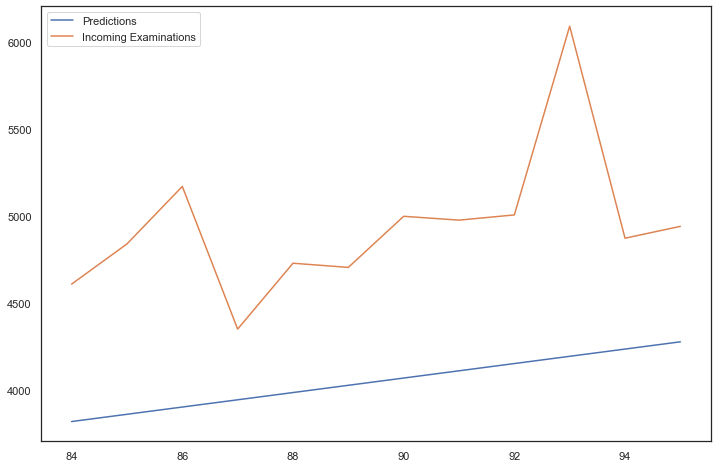

In [86]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Incoming Examinations'].plot(legend = True)

In [87]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["Incoming Examinations"], predictions)

965.4253003872425

In [88]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE Percentage magnitude of error
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'corr':corr, 'minmax':minmax})

forecast_accuracy(predictions, test['Incoming Examinations'])

{'mape': 0.17689118836892603,
 'corr': 0.43941630235597967,
 'minmax': 0.17689118836892614}

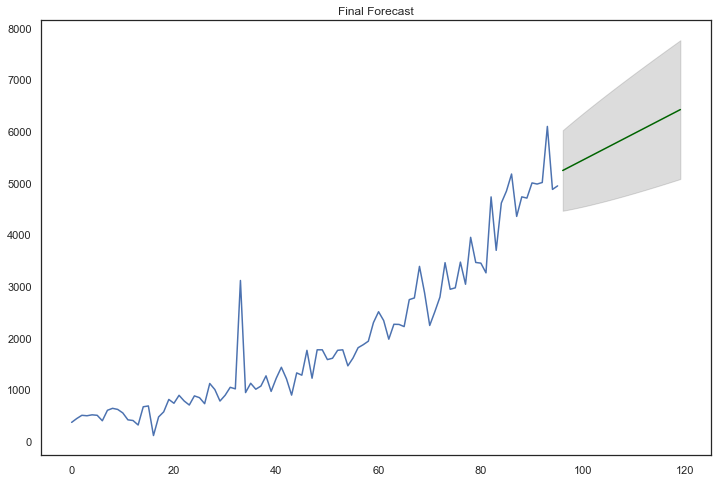

In [93]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods = n_periods, return_conf_int=True)
index_of_fc = np.arange(len(final_data['Incoming Examinations']), len(final_data['Incoming Examinations'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(final_data['Incoming Examinations'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [95]:
fc_series.to_csv("forcast_data_nonseasonal.csv")

In [101]:
df1 = pd.read_csv("forcast_data_nonseasonal.csv")

In [102]:
df1 = df.astype({"Forecast":'int'})

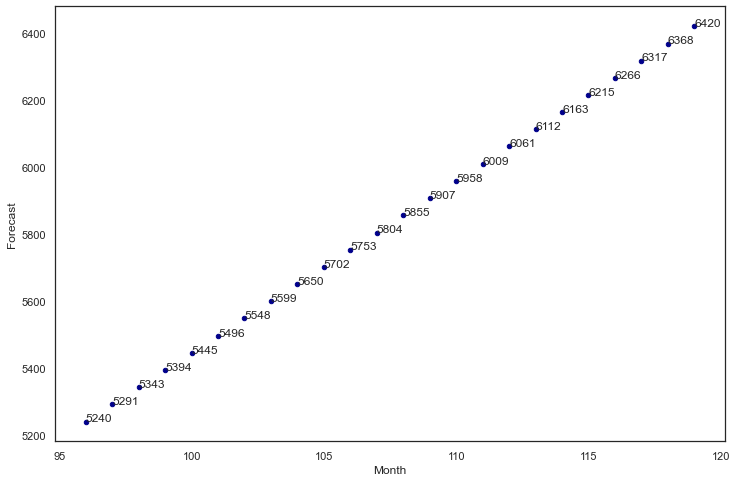

In [103]:
df1.plot.scatter(x='Month', y = 'Forecast',c='DarkBlue',colormap='viridis')
for i, label in enumerate(df1['Forecast']):
    plt.annotate(label, (df1['Month'][i], df1['Forecast'][i]))

# Seasonal ARIMA

In [3]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(Abbeville1['Close'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=8062.774, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4223.861, Time=2.96 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6409.439, Time=4.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=8063.226, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4718.555, Time=0.97 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4027.090, Time=11.22 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.80 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8062.951, Time=3.68 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=4026.889, Time=12.92 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=4222.078, Time=4.61 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=49.38 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=32.59 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1827
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood               -2005.728
Date:                             Sat, 22 Jan 2022   AIC                           4023.456
Time:                                     01:14:23   BIC                           4056.479
Sample:                                          0   HQIC                          4035.641
                                            - 1827                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9007      0.070     27.024      0.000       1.763       2.039
ar.L2         -0.9045      0.067    -13.444      0.000      -1.036      -0.773
ma.L1         -0.9178      0.078    -11.773      0.000      -1.071      -0.765
ar.S.L12      -0.6605      0.007    -99.953      0.000      -0.673      -0.648
ar.S.L24      -0.3222      0.006    -53.618      0.000      -0.334      -0.310
sigma2         0.5315      0.001    366.322      0.000       0.529       0.534
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):           6845319.94
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):              26.65   Skew:                            -7.56
Prob(H) (two-sided):                  0.00   Kurtosis:                       303.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# Split data into train / test sets
train = final_data.iloc[:len(final_data)-12]
test = final_data.iloc[len(final_data)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(2, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Incoming Examinations'], 
                order = (2, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:              Incoming Examinations   No. Observations:                   84
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -534.207
Date:                            Tue, 18 Jan 2022   AIC                           1082.413
Time:                                    22:06:57   BIC                           1098.252
Sample:                                         0   HQIC                          1088.712
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0475      0.220     -0.216      0.829      -0.478       0.383
ar.L2         -0.0388      0.206     -0.188      0.851      -0.443       0.366
ma.L1         -0.7442      0.180     -4.146      0.000      -1.096      -0.392
ar.S.L12      -0.7394      0.362     -2.041      0.041      -1.450      -0.029
ar.S.L24      -0.4762      0.193     -2.466      0.014      -0.855      -0.098
ma.S.L12       0.0156      0.471      0.033      0.974      -0.908       0.939
sigma2       1.79e+05   2.21e+04      8.099      0.000    1.36e+05    2.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                49.38
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             1.13
Prob(H) (two-sided):                  0.46   Kurtosis:                         6.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

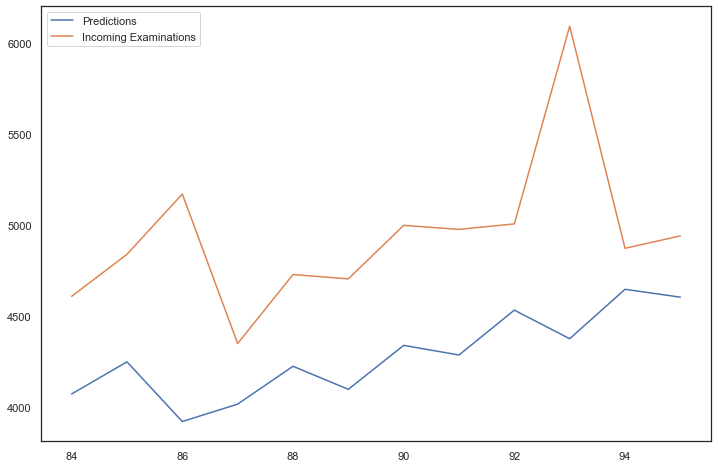

In [38]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Incoming Examinations'].plot(legend = True)

In [39]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["Incoming Examinations"], predictions)


773.3114153500348

In [74]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE Percentage magnitude of error
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'corr':corr, 'minmax':minmax})

forecast_accuracy(predictions, test['Incoming Examinations'])

{'mape': 0.17689118836892603,
 'corr': 0.43941630235597967,
 'minmax': 0.17689118836892614}

<AxesSubplot:>

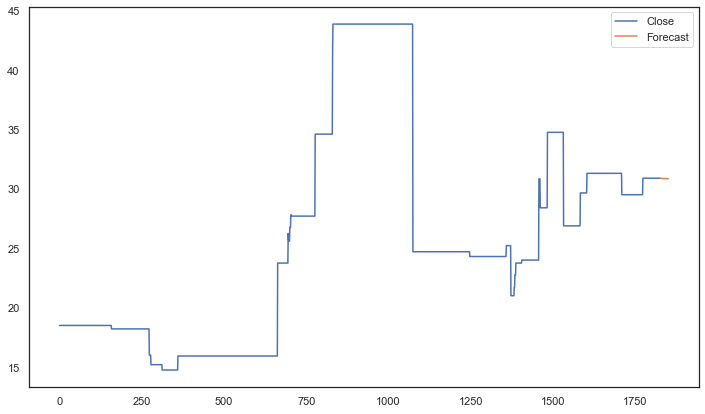

In [4]:
# Train the model on the full dataset
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = model = SARIMAX(Abbeville1['Close'],
                        order = (2, 0, 1),
                        seasonal_order =(2, 1, 0, 12))
result = model.fit()

# Forecast for the next 2 years
forecast = result.predict(start = len(Abbeville1),
                        end = (len(Abbeville1)-1) + 2 * 12,
                        typ = 'levels').rename('Forecast')

# Plot the forecast values
Abbeville1['Close'].plot(figsize = (12, 7), legend = True)
forecast.plot(legend = True)


### Plotting the forecasted result on Scatter Plot

In [51]:
forecast.to_csv("forcast_data_seasonal1.csv")

In [59]:
df = pd.read_csv("forcast_data_seasonal.csv")

In [73]:
df = df.astype({"Forecast":'int'})

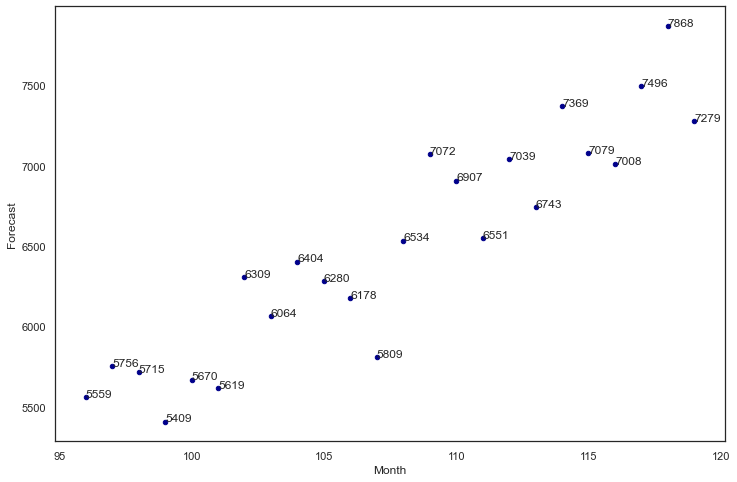

In [83]:
df.plot.scatter(x='Month', y = 'Forecast',c='DarkBlue',colormap='viridis')
for i, label in enumerate(df['Forecast']):
    plt.annotate(label, (df['Month'][i], df['Forecast'][i]))

### 4. Comment on the seasonality of data.

As from the above Trend graphs we can see that the overall requests are in increasing order, a pattern of increasing requests is followed every month from 2006 with one or two spikes and the same pattern is followed when the prediction model is applied.
#### Accuracy of seasonal ARIMA Model is 82.32%
From SARIMAX model forecasting we can see that forecasting values are following the upward trend.

In comparison to 2013 there is 19.34% increase in Incoming examination in 2014 and in comparison to 2014 there is 20% increase in incoming examination in 2015.